In [2]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl

# Visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data-processing modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modeling and evaluation modules 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Module for saving model
import pickle 

# Set seed for reproducibility 
SEED = 3

## Part I. Data Processing

a) Import the data: shape should be (30000,24)

In [4]:
# Load data
data = pd.read_excel("default of credit card clients.xls", index_col = 0)
data.shape

(30000, 24)

b) Remove any rows that have missing data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
# Drop rows will null values 
data.dropna(axis = 0,inplace = True)
# Verify dimension 
data.shape

c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 

In [10]:
# Create X and y objects 
y = data['default payment next month']
X = data.drop(['default payment next month'], axis=1)
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.

In [11]:
# Split into train and test data, randome_state = SEED for reproducibility
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state = SEED)

## Part II. Random Forest Classifier - Base Model

Start by creating a simple Random Forest only using default parameters.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state (check documentation to confirm how to do this). 

In [15]:
# Create a Random Forest instance, set random_state = SEED for reproducibility
rf_base = RandomForestClassifier(random_state = SEED)
# Fit on X_train and y_train
rf_base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [30]:
# Predict test data 
y_pred_base = rf_base.predict(X_test)
# Calculate predicted probabilities 
base_probs = rf_base.predict_proba(X_test)
# Show predicitions and predicted probabilities on the first 5 instances 
print(y_pred_base[0:5])
print(base_probs[0:5])

[0 1 0 0 0]
[[0.87 0.13]
 [0.38 0.62]
 [0.74 0.26]
 [0.9  0.1 ]
 [0.62 0.38]]


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.

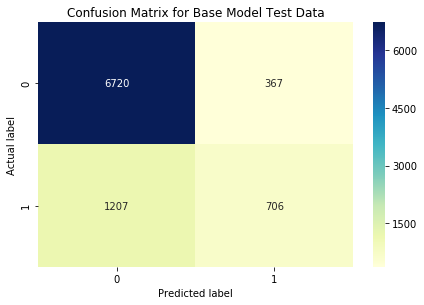

In [20]:
# Generate confusion matrix and classification report 
cnf_base_test = metrics.confusion_matrix(y_test, y_pred_base)
clr_base_test = metrics.classification_report(y_test, y_pred_base)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_base_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [21]:
# Print classification report
print(clr_base_test)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7087
           1       0.66      0.37      0.47      1913

    accuracy                           0.83      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.81      0.83      0.81      9000



d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

In [68]:
# Calculate roc_auc_score for class 1 
roc_auc_base_test = metrics.roc_auc_score(y_test, base_probs[:,1])
print(roc_auc_base_test)

0.7680806194034843


e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

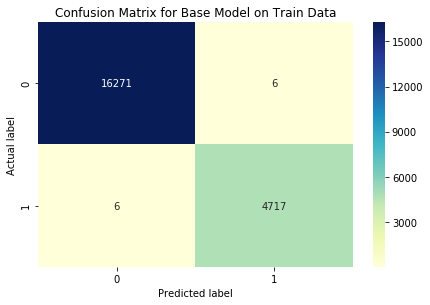

In [83]:
# Predict train data 
y_pred_base_train = rf_base.predict(X_train)

# Generate confusion matrix
cnf_base_train = metrics.confusion_matrix(y_train, y_pred_base_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_base_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [34]:
# Generate classification report 
clr_base_train = metrics.classification_report(y_train, y_pred_base_train)
print(clr_base_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16277
           1       1.00      1.00      1.00      4723

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [69]:
# Calculate predicted probability 
base_train_probs = rf_base.predict_proba(X_train)
# Calculate roc_auc_score for class 1 
roc_auc_base_train = metrics.roc_auc_score(y_train, base_train_probs[:,1])
print(roc_auc_base_train)

0.9999970146835035


There are signs of overfitting since the accuracy and roc_auc_score of the train data (both 1.00) are significantly higher than those of the test data (0.83 and 0.77). The classification reports of the train data suggest pretty much perfect classification, with 100% in precision, recall and f1-score. All these signs suggest that the model has learned the pattern from the train data extremely well, including the noise, and thus the pattern in the train data cannot be applied to the test data and fail to achieve the same level of accuracy when making predictions on the test data.

## Part III. Random Forest Classifier - Grid Search

a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: 

* n_estimators: 50, 100, 500
* max_features: 2, 4, sqrt
* max_depth: 6, 8, 10, 12

In [40]:
# Create a dictionary of parameters 
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_features': [2, 4, "sqrt"],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split':[3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3],
    'random_state':[SEED]}

# Create a Random Forest model 
rf_obj = RandomForestClassifier()

# Create grid search object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [41]:
# Fit the grid search model
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 59.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 64.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

b) Identify the best performing model

In [42]:
# Identify the best model from my grid search 
best_model = rf_Grid.best_estimator_

In [43]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [47]:
# Predict test data using best model
y_pred_best = best_model.predict(X_test)
# Calculate predicted probabilities 
best_probs = best_model.predict_proba(X_test)
# Show predicitions and predicted probabilities on the first 5 instances 
print(y_pred_best[0:5])
print(best_probs[0:5])

[0 0 0 0 1]
[[0.86965433 0.13034567]
 [0.63434687 0.36565313]
 [0.7927071  0.2072929 ]
 [0.9200581  0.0799419 ]
 [0.47460606 0.52539394]]


d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

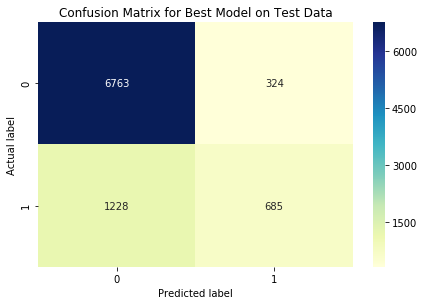

In [84]:
# Generate confusion matrix and classification report for test data
cnf_best_test = metrics.confusion_matrix(y_test, y_pred_best)
clr_best_test = metrics.classification_report(y_test, y_pred_best)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [85]:
# Print classification report 
print(clr_best_test)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7087
           1       0.68      0.36      0.47      1913

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.83      0.81      9000



e) Calculate the roc_auc_score for this model.

In [86]:
# Calculate roc_auc_score for class 1 
roc_auc_best_test = metrics.roc_auc_score(y_test, best_probs[:,1])
print(roc_auc_best_test)

0.7879592011200353


f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?


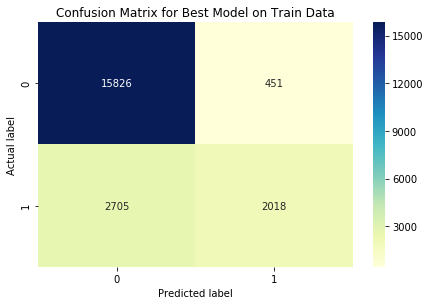

In [51]:
# Predict train data 
y_pred_best_train = best_model.predict(X_train)

# Generate confusion matrix
cnf_best_train = metrics.confusion_matrix(y_train, y_pred_best_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [87]:
# Generate classification report 
clr_best_train = metrics.classification_report(y_train, y_pred_best_train)
print(clr_best_train)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     16277
           1       0.82      0.43      0.56      4723

    accuracy                           0.85     21000
   macro avg       0.84      0.70      0.74     21000
weighted avg       0.85      0.85      0.83     21000



In [89]:
# Calculate predicted probability 
best_train_probs = best_model.predict_proba(X_train)

# Calculate roc_auc_score for class 1 
roc_auc_best_train = metrics.roc_auc_score(y_train, best_train_probs[:,1])
print("ROC_AUC_Score:", roc_auc_best_train)

ROC_AUC_Score: 0.8548550371284267


There are signs of overfitting since the roc_auc_score of the train data (0.855) is higher than that of the test data (0.788). The precision, recall and f1 scores for class 1 in the train data are also consistently higher than those in the test data. All these signs suggest that the model has learned too much variance from the train data, including some of the noise, and thus the pattern is not entirely applicable to the test data and fail to achieve the same level of accuracy when making predictions on the test data.

## Part IV. Feature Importances

a) What are the top 5 features for this model?

In [53]:
# Understand feature importace 
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(5)

,importance
feature,
PAY_0,0.248
PAY_2,0.115
PAY_3,0.066
PAY_4,0.048
PAY_5,0.043


## Part V. Conceptual Questions

a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2? Explain why.

Here are the best paramaters from the Grid Search: 

In [57]:
rf_Grid.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 500,
 'random_state': 3}

In [76]:
# Show classification report and roc_auc_score of base model (model 2)
print("Classification Report of Base Model on Test Data:\n")
print(clr_base_test)
print("ROC_AUC_Score on Test Data:", roc_auc_base_test)

Classification Report of Base Model on Test Data:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7087
           1       0.66      0.37      0.47      1913

    accuracy                           0.83      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.81      0.83      0.81      9000

ROC_AUC_Score on Test Data: 0.7680806194034843


In [77]:
# Show classification report and roc_auc_score of best-performing model (model 3)
print("Classification Report of Best Model on Test Data:\n")
print(clr_best_test)
print("ROC_AUC_Score on Test Data:", roc_auc_best_test)

Classification Report of Best Model on Test Data:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7087
           1       0.68      0.36      0.47      1913

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.83      0.81      9000

ROC_AUC_Score on Test Data: 0.7879592011200353


Model 3 outperforms model 2, as suggested by improvements in certain test metrics, including the slightly increased roc_auc_score and precision on class 1 of model 3. Additionally, the difference between the test and train roc_auc_score is smaller in model 3 than model 2, suggesting that model 3 suffers from less overfitting than model 2 and can generalize better on test data.

b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case. 

In [79]:
# Table with the roc—auc scores for easy comparison
compare = pd.DataFrame({
    'Model Number': [2,3],
    
    'Test ROC_AUC': [roc_auc_base_test, roc_auc_best_test],
    
    'Train ROC_AUC': [roc_auc_base_train, roc_auc_best_train]
    })

compare

,Model Number,Test ROC_AUC,Train ROC_AUC
0,2,0.768081,0.999997
1,3,0.787959,0.854855


In [66]:
# Get parameters used in the base model (model 2)
rf_base.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)>

While also suffering from overfitting, the degress of severity is lower in model 3 compared to model 2 due to the smaller difference between test and train roc_auc score. Model 2 has no limitation on max_depth. The min_samples_leaf is 1, meaning that the tree will stop splitting when the minimum number of samples at a leaf node reaches 1. The min_samples_split = 2 means that only 2 samples are required to split an internal node. Therefore, model 2 builds much deeper trees than in model 3 and split until all nodes are completely pure and contain only 1 sample. Such flexibility leads to a highly complex model 2, which suffers from severe overfitting. In addition, model 2 has less n_estimators (100), which means it builds 100 decision trees as opposed to 500 build in model 3. Since model 3 builds more uncorrelated trees, it can average out the individual errors better and further reduce variance. 

Hyperparameter tuning helps reduce overfitting. In model 3 we applied grid search to perform exhaustive search over different combinations of the specified hyperparamaters. And k-fold cross validation helped us pick the hyperparameter combination that results in the highest roc_auc_score. However, because we have specified the paramater grid, the algorithm's performance is still limited by the hyperparameter values we proposed, thus grid search cannot guarantee to completely remove the overfitting issue. 

c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 

<img src="gini_index.jpg" style="width:350px;height:250px/">

The Gini Index is the measure of impurity in a set of data. In the case of Random Forest Classification, the Gini Impurity is measured at each node level in each decision tree that makes up the random forest. The Gini Impurity of a node is the probability that a randomly chosen sample in a node would be incorrectly labeled if it was labeled by the distribution of samples in the node. Using the example decision tree shown above, we can calculate that the Gini Index of the root node is 1-((50/150)^2+(50/150)^2+(50/150)^2)= 0.667. 

At each node, the decision tree searches through the features for the value to split on that results in the greatest reduction in Gini Impurity. This splitting process is performed recursively until the maximum depth limit is reached, or until each node only contains samples from one class (aka the node is pure). A pure node would have gini index of 0 as no datapoint from that node is be misclassified. Gini Index helps select the features that would make the children nodes purer and improve model performance. 

d) Describe how Random Forest is different from bagging & why this difference can yield improved results.

Random forest is an ensemble learning algorithm that combines multiple decision trees, while bagging is an ensemble model that can combine multiple different models to generate the final predictive model. Since we're considering random forest, its parallel in bagging would be bagged decision trees. Both models are very popular as they can reduce variance in prediction. 

The fundamental difference between bagging trees and random forest is the level of randomness involved. While both algorithms create boostrapped samples by drawing random samples with replacement from the training data, random forest introduces another type of randomness by splitting on random subset of features. That is, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node. Assume we have a dataset with M features and we create bootstrapped samples by uniformly drawing random samples with replacement. Now we want to train our classifiers on the bootstrapped samples. The random forest algorithm will split on m (which is less than M) features at each node, as opposed to bagging which would split on all M features. A graphical representation is shown below:

<img src = "d.jpg" style="width:500px;height:250px/">

Due to this additional type of randomness (i.e. the random feature selection), the trees in random forest are split on very different dimensions and are more independent of each other compared to bagging. So when aggregating to obtain the final model, random forest would yield predictions with lower variance, leading to better predictive performance.

e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

The max_depth parameter represents how many splits deep you want each decision tree to go. The deeper the tree, the more splits it has and the more information about the train data is captured. If max_depth = None, then the nodes are expanded until all leaves are pure or until all leaves contain less samples than the minimum number of samples required to split an internal node (i.e. min_samples_split). 

If we don't limit the maximum depth of trees, each tree would have unlimited flexibility, meaning that it can keep growing until it has exactly one leaf node for every single observation, perfectly classifying all training data. While this reduces bias, the trees would also be learning from the noise in the data, which leads the problem of overfitting and our prediction would suffer from high variance. Therefore, it is recommended that we prune the trees (i.e. limit max_depth) in order to find the optimal balance between bias and variance and obtain the best-performing model.

f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

K-Fold Cross Validation:

When we build a machine learning model, we make sure to split our data into a train and a test set. In k-fold cross validation, the training set is randomly split into k number of subsets, or folds. We then iteratively fit the model k times, each time training the data on k-1 folds and evaluating on the k-th fold (called the validation data). As an example, consider fitting a model with K = 5 (graphical representation shown below). The first iteration we train on the first 4 folds and evaluate on the 5th. The second time we train on the 1st, 2nd, 3rd, and 5th fold and evaluate on the 4th. We repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, we average the performance on each fold to come up with final validation metrics for the model. 

<img src = "kfolds.jpg" style="width:400px;height:250px/">

Benefits of K-Fold Cross Validation: 

K-fold cross validation enables better model evaluation. Compared to the train-test split approach where the model is tested only on the one test set, k-fold cross validation iterates on the training and testing process k times. This ensures the model would experience changes in the distribution of the train and validation sets, and thus reduces the error caused by variability between the training and testing set. As a result, k-fold cross validation provides a better estimation of the model's performance on unseen data. 